In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import src.workfile_functions as wf

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

In [2]:
train = pd.read_csv('../data/pc/train.csv',index_col=None)

In [3]:
train[[
        'first_floor_area_primary',
        'end_floor_area_primary',
        'delta_floor_area_primary'
]].sample(4)

,first_floor_area_primary,end_floor_area_primary,delta_floor_area_primary
298827,1254.0,1254.0,0.0
10107,1459.0,1459.0,0.0
491260,3444.0,3444.0,0.0
26515,2125.0,2125.0,0.0


In [4]:
train[[
    'foundation_Basement',
    'foundation_Crawl Space',
    'foundation_Slab',
    'foundation_Mixed'
]].sample(4)

,foundation_Basement,foundation_Crawl Space,foundation_Slab,foundation_Mixed
396548,0.0,0.0,1.0,0.0
282518,0.0,0.0,1.0,0.0
585670,0.0,0.0,1.0,0.0
360593,0.0,0.0,1.0,0.0


# Scores

In [15]:
data = {
    'Model': [
        'OLS', 'LASSO', 'Ridge', 'RidgeCV',
        'XGBR','XGBR_GS','LGBM','Ensemble',
        'Stack_1','Stack_2','Stack_3'
    ],
    'Train RMSE': [
        42103.47, 48757.61, 42101.38, 42101.38,
        24121.34, 40700.99, 42000.00, 41068.07,
        43313.99, 37393.21, 33441.12
    ],
    'Test RMSE (Public)': [
        48478.35, 46676.85, 48857.30, 47080.00,
        42143.88, 43196.91, 170263.72, 44709.20,
        43589.06, 42896.77, 45241.33
    ],
    'Test RMSE (Private)': [
        46903.05, 45345.82, 47746.13, 45075.56,
        43759.64, 44054.83, 174621.3, 44458.82,
        44946.14, 44380.56, 44128.42
    ]
}

In [16]:
df = pd.DataFrame(data)

In [19]:
df_melted = df.melt(id_vars='Model', value_vars=['Train RMSE', 'Test RMSE (Public)', 'Test RMSE (Private)'],
                    var_name='Metric', value_name='RMSE')

In [20]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#ebebeb"})  # slightly grayer

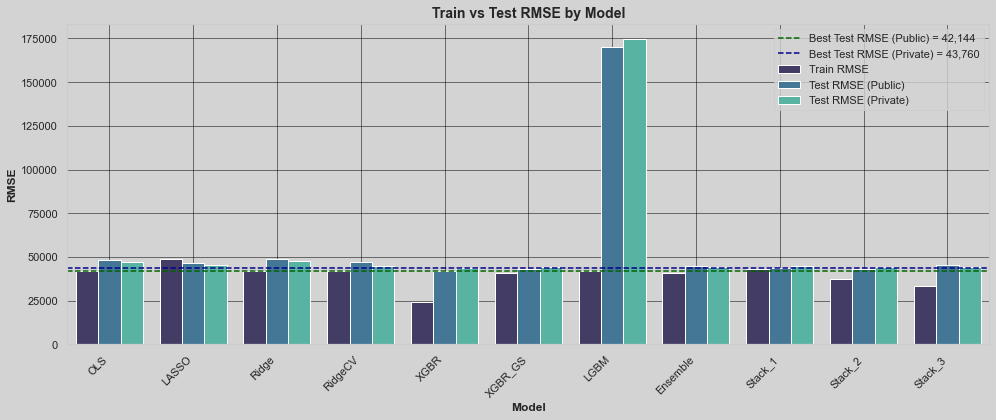

In [25]:
plt.figure(figsize=(14, 6))
# sns.set(style="whitegrid", rc={"axes.facecolor": "#d3d3d3"})  # slightly darker gray
sns.set(style="whitegrid", rc={
    "axes.facecolor": "#d3d3d3",    # inside the plot
    "figure.facecolor": "#d3d3d3",  # everything around it
    "grid.color": "black",
    "grid.linewidth": 0.5
})

bar = sns.barplot(data=df_melted, x='Model', y='RMSE', hue='Metric', palette='mako')

# Add value labels
# for p in bar.patches:
#     height = p.get_height()
#     if not pd.isna(height):
#         bar.annotate(f'{height:,.0f}',
#                      (p.get_x() + p.get_width() / 2, height),
#                      ha='center', va='bottom', fontsize=9)

# Add horizontal line for best (lowest) Test RMSE
min_test_rmse_pub = df['Test RMSE (Public)'].min()
plt.axhline(min_test_rmse_pub, linestyle='--', color='darkgreen', linewidth=1.5, label='Best Test RMSE (Public) = 42,144')

# same but for private leaderboard
min_test_rmse_priv = df['Test RMSE (Private)'].min()
plt.axhline(min_test_rmse_priv, linestyle='--', color='darkblue', linewidth=1.5, label='Best Test RMSE (Private) = 43,760')

plt.grid(True, color='black', linewidth=0.5)

# Bold titles and labels
plt.legend()
plt.title("Train vs Test RMSE by Model", fontweight='bold', fontsize=14)
plt.ylabel("RMSE", fontweight='bold')
plt.xlabel("Model", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();